In [ ]:
import pandas as pd

# 2. Fazer upload do arquivo manualmente
from google.colab import files
uploaded = files.upload()  # isso vai abrir uma janelinha para você subir o CSV

df = pd.read_csv('insurance.csv')

df.head()




Saving insurance.csv to insurance (3).csv


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
contagem_regiao = df['region'].value_counts()

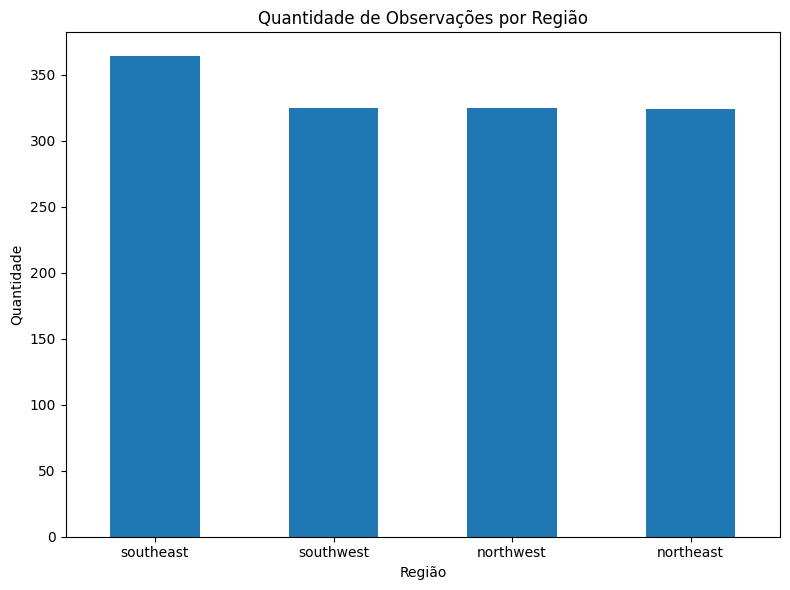

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Define o tamanho da figura
contagem_regiao.plot(kind='bar') # Cria o gráfico de barras
plt.title('Quantidade de Observações por Região') # Título do gráfico
plt.xlabel('Região') # Rótulo do eixo X
plt.ylabel('Quantidade') # Rótulo do eixo Y
plt.xticks(rotation=0) # Garante que os rótulos do eixo X não estejam rotacionados
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show() # Exibe o gráfico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


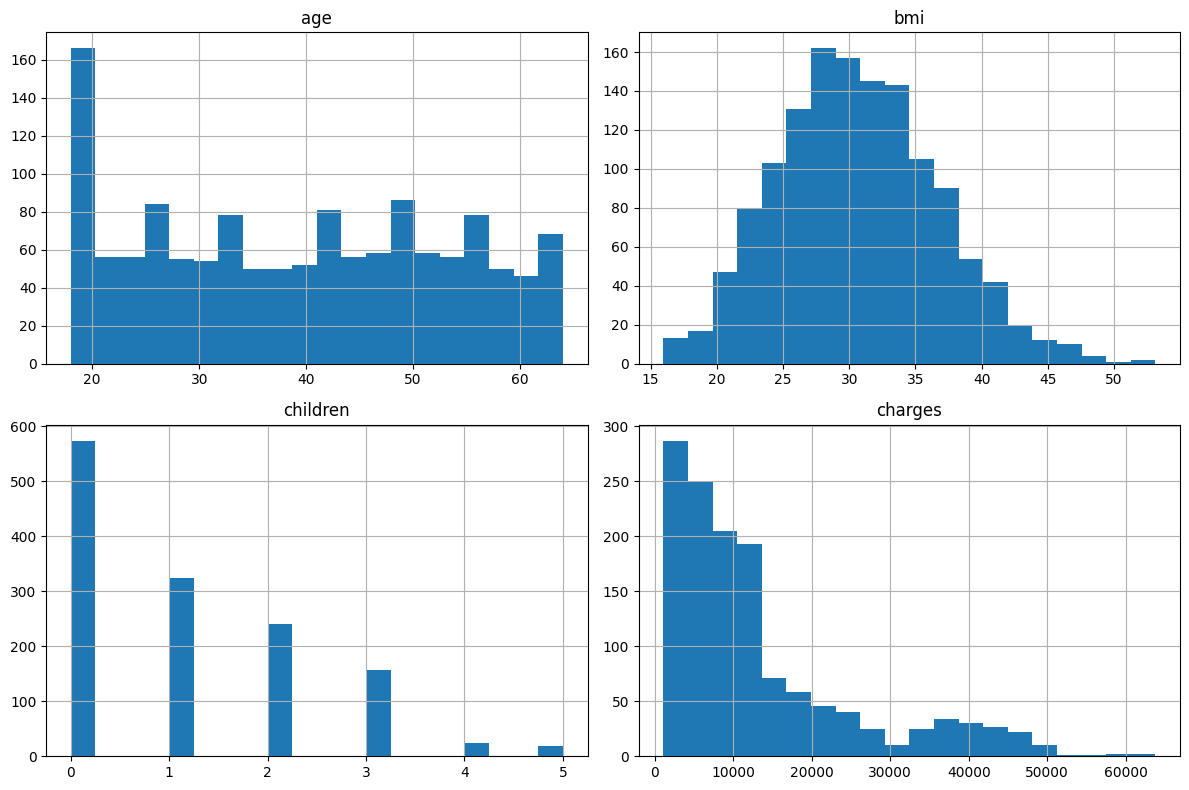

,charges
smoker,
no,8434.268298
yes,32050.231832


In [ ]:
# 1. Primeiras linhas
df.head()

# 2. Informações da base
df.info()

# 3. Estatísticas básicas
df.describe()

# 4. Contagem por sexo
df['sex'].value_counts()

# 5. Verificar valores nulos
df.isna().sum()

# 6. Histogramas automáticos
import matplotlib.pyplot as plt
df.hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

# 7. Média de charges por status de fumante
df.groupby('smoker')['charges'].mean()


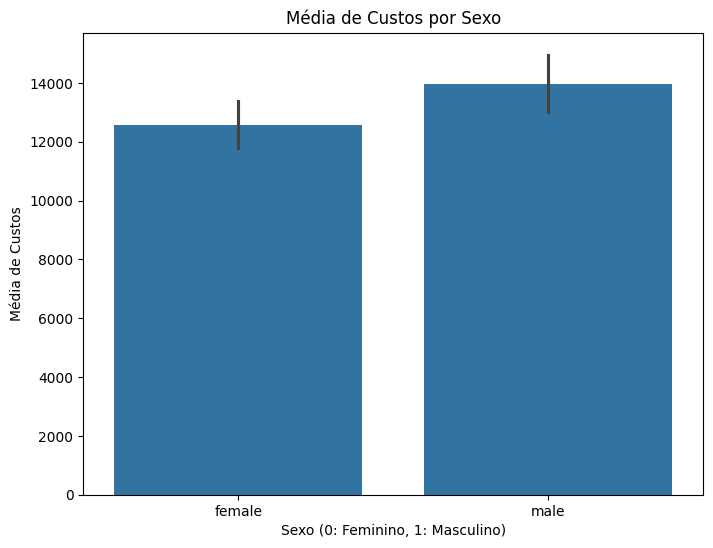

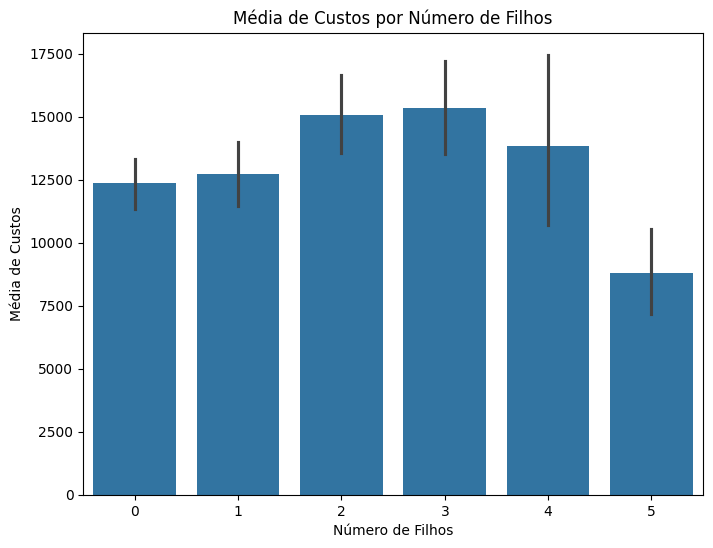

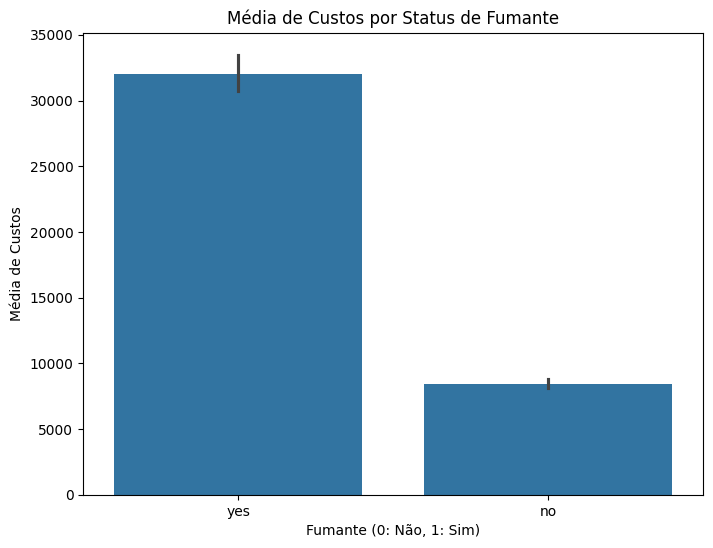

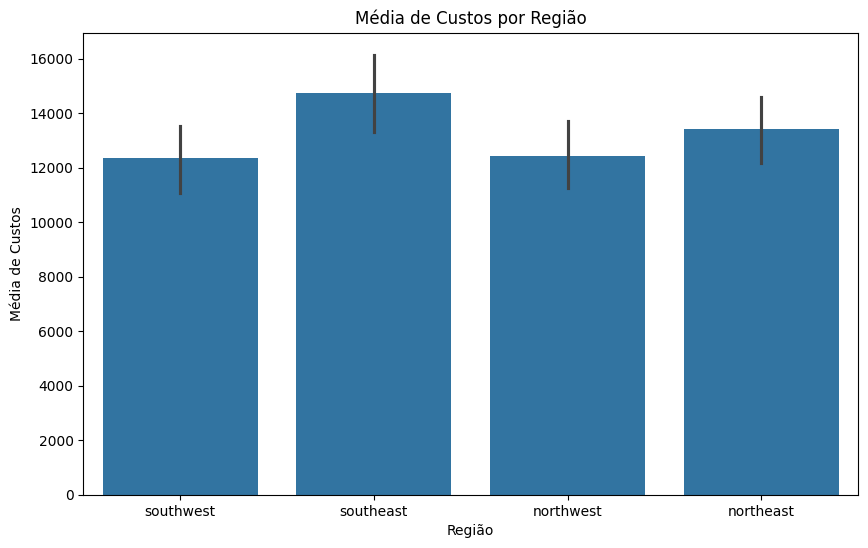

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Gráfico de barras para a média de Charges por Sexo
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='charges', data=df)
plt.title('Média de Custos por Sexo')
plt.xlabel('Sexo (0: Feminino, 1: Masculino)')
plt.ylabel('Média de Custos')
plt.show()

# Gráfico de barras para a média de Charges por Número de Filhos
plt.figure(figsize=(8, 6))
sns.barplot(x='children', y='charges', data=df)
plt.title('Média de Custos por Número de Filhos')
plt.xlabel('Número de Filhos')
plt.ylabel('Média de Custos')
plt.show()

# Gráfico de barras para a média de Charges por Status de Fumante
plt.figure(figsize=(8, 6))
sns.barplot(x='smoker', y='charges', data=df)
plt.title('Média de Custos por Status de Fumante')
plt.xlabel('Fumante (0: Não, 1: Sim)')
plt.ylabel('Média de Custos')
plt.show()

# Gráfico de barras para a média de Charges por Região
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=df)
plt.title('Média de Custos por Região')
plt.xlabel('Região')
plt.ylabel('Média de Custos')
plt.show()

<Axes: xlabel='charges', ylabel='Count'>

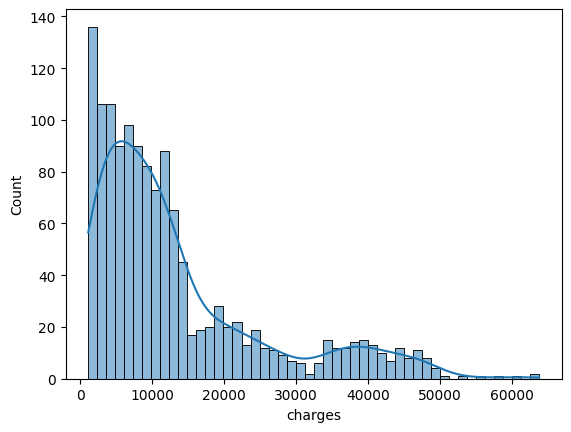

In [ ]:
import seaborn as sns
sns.histplot(df['charges'], bins=50, kde=True)


In [ ]:
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
df = pd.get_dummies(df, columns=['region'], drop_first=False)
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

# 1. Selecionar Variáveis
# Features (variáveis independentes)
X = df[['age', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

# Target (variável dependente)
y = df['charges']


# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Fazer previsões
y_pred_lr = modelo_lr.predict(X_test)

# Avaliar o modelo
print("🔹 Regressão Linear:")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

🔹 Regressão Linear:
R²: 0.7800755882073586
MAE: 4222.996246596083


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Features (variáveis independentes)
X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]


# Target (variável dependente)
y = df['charges']

# Criar features polinomiais
grau_polinomial = 2 # Você pode ajustar o grau do polinômio
poly_features = PolynomialFeatures(degree=grau_polinomial)
X_poly = poly_features.fit_transform(X)


# Separar treino e teste
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Regressão Polinomial
modelo_poly = LinearRegression()
modelo_poly.fit(X_train_poly, y_train)

# Fazer previsões
y_pred_poly = modelo_poly.predict(X_test_poly)

# Avaliar o modelo
print(f"🔹 Regressão Polinomial (Grau {grau_polinomial}):")
print("R²:", r2_score(y_test, y_pred_poly))
print("MAE:", mean_absolute_error(y_test, y_pred_poly))

🔹 Regressão Polinomial (Grau 2):
R²: 0.8692975322069121
MAE: 2685.3448170096553


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# Assumindo que df já está carregado e pré-processado conforme seu código anterior

# Features (variáveis independentes)
X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex']]


# Target (variável dependente)
y = df['charges']

# Separar treino e teste
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Árvore de Decisão para Regressão
modelo_dt = DecisionTreeRegressor(random_state=42) # random_state para reprodutibilidade
modelo_dt.fit(X_train_dt, y_train_dt)

# Fazer previsões
y_pred_dt = modelo_dt.predict(X_test_dt)

# Avaliar o modelo
print("🔹 Árvore de Decisão para Regressão:")
print("R²:", r2_score(y_test_dt, y_pred_dt))
print("MAE:", mean_absolute_error(y_test_dt, y_pred_dt))

🔹 Árvore de Decisão para Regressão:
R²: 0.6931530273154684
MAE: 3346.800375768657


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# Assumindo que df já está carregado e pré-processado conforme seu código anterior

# Features (variáveis independentes)
X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

# Target (variável dependente)
y = df['charges']

# Separar treino e teste
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de Random Forest para Regressão
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42) # n_estimators é o número de árvores
modelo_rf.fit(X_train_rf, y_train_rf)

# Fazer previsões
y_pred_rf = modelo_rf.predict(X_test_rf)

# Avaliar o modelo
print("🔹 Random Forest para Regressão:")
print("R²:", r2_score(y_test_rf, y_pred_rf))
print("MAE:", mean_absolute_error(y_test_rf, y_pred_rf))

🔹 Random Forest para Regressão:
R²: 0.8683655116929723
MAE: 2470.5008867561573


#      Análise - Melhores resultados
***


Regressão Linear:	R²: 0.7836	/ MAE: 4181.19 /	Colunas: age, bmi, smoker, children, region, sex

Polinomial (grau 2):	R²: 0.8693	/ MAE: 2685.34	/ Colunas: age, bmi, smoker, children, region

Árvore de Decisão	R²: 0.7535 /	MAE: 2854.54	/ Colunas: age, bmi, smoker, children, region

Random Forest	R²: 0.8683 /	MAE: 2470.50	/ Colunas: age, bmi, smoker, children, region

#Regressão Linear
*******


X = df[['age', 'bmi', 'smoker']]
y = df['charges']

🔹 Regressão Linear:
R²: 0.7776932310583374
MAE: 4260.560091099392

-

X = df[['age', 'bmi', 'smoker', 'children']]
y = df['charges']

🔹 Regressão Linear:
R²: 0.7811147722517886
MAE: 4213.798594527246

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

🔹 Regressão Linear:
R²: 0.7835569786290856
MAE: 4182.011828516012

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex']]

y = df['charges']


🔹 Regressão Linear:
R²: 0.7835929767120724
MAE: 4181.194473753638

-

X = df[['age', 'bmi', 'smoker','region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex']]

y = df['charges']


🔹 Regressão Linear:
R²: 0.7800795892260536
MAE: 4222.908401655544

-

X = df[['age', 'bmi', 'smoker', 'sex']]

y = df['charges']


🔹 Regressão Linear:
R²: 0.7776757765738431
MAE: 4260.991696434016

-

X = df[['age', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

🔹 Regressão Linear:
R²: 0.7800755882073586
MAE: 4222.996246596083


****
#REGRESSÃO POLINOMIAL
****


X = df[['age', 'bmi', 'smoker']]
)
y = df['charges']

🔹 Regressão Polinomial (Grau 2):
R²: 0.8611724832684049
MAE: 2841.1964029834344

-

X = df[['age', 'bmi', 'smoker', 'children']]


y = df['charges']

🔹 Regressão Polinomial (Grau 2):
R²: 0.8670430253632888
MAE: 2773.5716510212515

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

🔹 Regressão Polinomial (Grau 2):
R²: 0.8692975322069121
MAE: 2685.3448170096553

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex']]

y = df['charges']

🔹 Regressão Polinomial (Grau 2):
R²: 0.8665830903164846
MAE: 2729.5001336394184


-

X = df[['age', 'bmi', 'smoker', 'sex']]

y = df['charges']


🔹 Regressão Polinomial (Grau 2):
R²: 0.8669441556658776
MAE: 2783.3568052029177

-

X = df[['age', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

🔹 Regressão Polinomial (Grau 2):
R²: 0.8634718819857696
MAE: 2774.5009453542843

*****
#ÁRVORE DE DECISÃO
*****


X = df[['age', 'bmi', 'smoker']]

y = df['charges']

🔹 Árvore de Decisão para Regressão:
R²: 0.7415009348241524
MAE: 3133.5445017126863

-


X = df[['age', 'bmi', 'smoker', 'children']]

y = df['charges']


🔹 Árvore de Decisão para Regressão:
R²: 0.7057417401991726
MAE: 3114.2239903134323

-


X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

🔹 Árvore de Decisão para Regressão:
R²: 0.7534676355524017
MAE: 2854.5474588395523

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex']]

y = df['charges']

🔹 Árvore de Decisão para Regressão:
R²: 0.6931530273154684
MAE: 3346.800375768657


-


X = df[['age', 'bmi', 'smoker', 'sex']]

y = df['charges']

🔹 Árvore de Decisão para Regressão:
R²: 0.7148920902238374
MAE: 3249.5640118619403

-

X = df[['age', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

🔹 Árvore de Decisão para Regressão:
R²: 0.7129131727182038
MAE: 3361.141628018657


****
#RANDOM FOREST
****


X = df[['age', 'bmi', 'smoker']]

y = df['charges']

🔹 Random Forest para Regressão:
R²: 0.8346644445453022
MAE: 2755.556764385067

-

X = df[['age', 'bmi', 'smoker', 'children']]

y = df['charges']

🔹 Random Forest para Regressão:
R²: 0.8591950981146624
MAE: 2517.3415036891884

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

🔹 Random Forest para Regressão:
R²: 0.8683655116929723
MAE: 2470.5008867561573

-

X = df[['age', 'bmi', 'smoker', 'children', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'sex']]

y = df['charges']

🔹 Random Forest para Regressão:
R²: 0.8642420637164046
MAE: 2553.140980431126

-

X = df[['age', 'bmi', 'smoker', 'sex']]

y = df['charges']

🔹 Random Forest para Regressão:
R²: 0.850458809196456
MAE: 2635.058765970476

-

X = df[['age', 'bmi', 'smoker', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]

y = df['charges']

🔹 Random Forest para Regressão:
R²: 0.8440732717786896
MAE: 2753.100368511072


<ipython-input-25-5b27ba7d6845>:10: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


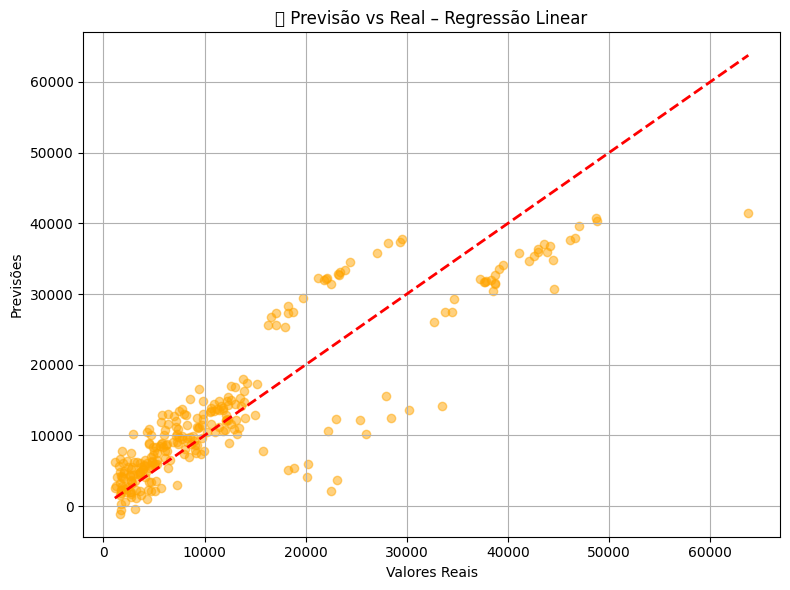

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("🔹 Previsão vs Real – Regressão Linear")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-19-a0f3bebeefd6>:10: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


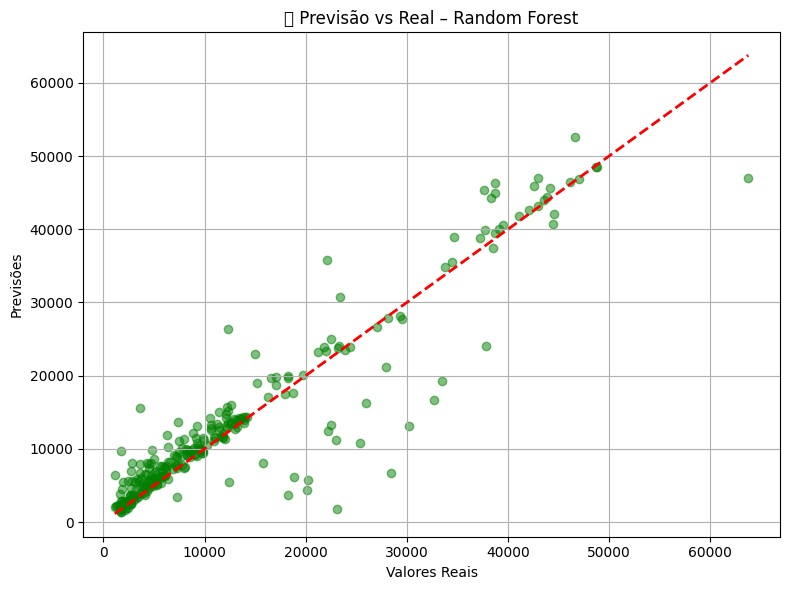

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Linha ideal
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("🔹 Previsão vs Real – Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-11-b52716ab8430>:10: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


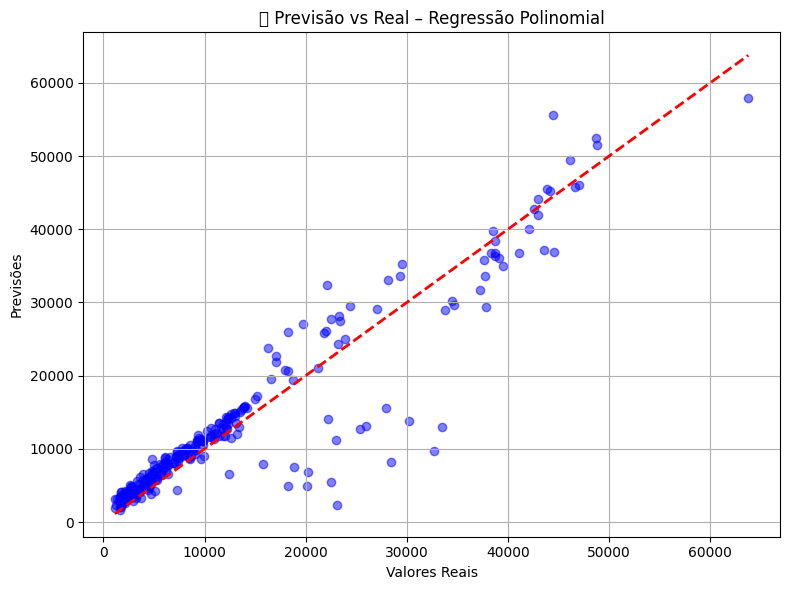

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Linha de referência
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("🔹 Previsão vs Real – Regressão Polinomial")
plt.grid(True)
plt.tight_layout()
plt.show()


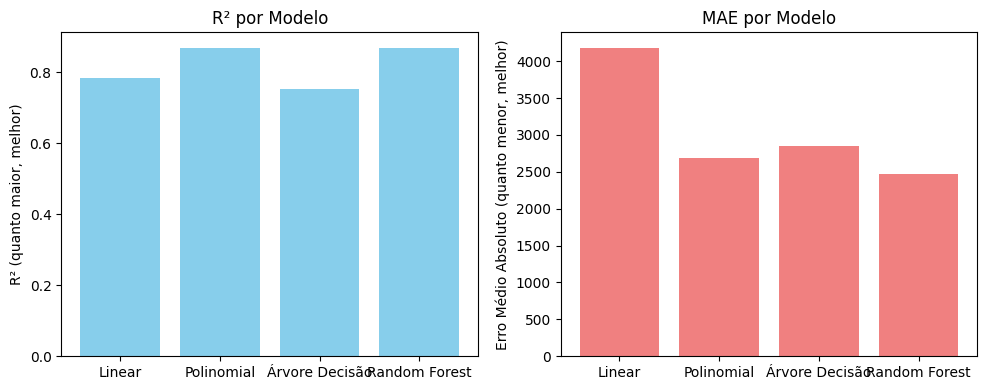

In [ ]:
import matplotlib.pyplot as plt

# R² de cada modelo
r2_scores = {
    'Linear': 0.7835929767120724,
    'Polinomial': 0.8692975322069121,
    'Árvore Decisão': 0.7534676355524017,
    'Random Forest': 0.8683655116929723
}

# MAE de cada modelo
mae_scores = {
    'Linear': 4181.194473753638,
    'Polinomial': 2685.3448170096553,
    'Árvore Decisão': 2854.5474588395523,
    'Random Forest': 2470.5008867561573
}

# Plotar R²
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(r2_scores.keys(), r2_scores.values(), color='skyblue')
plt.title('R² por Modelo')
plt.ylabel('R² (quanto maior, melhor)')

# Plotar MAE
plt.subplot(1, 2, 2)
plt.bar(mae_scores.keys(), mae_scores.values(), color='lightcoral')
plt.title('MAE por Modelo')
plt.ylabel('Erro Médio Absoluto (quanto menor, melhor)')

plt.tight_layout()
plt.show()

#Observações e conclusão

Analisando os dados e os graficos eu considerei incluir a coluna region como dado de entrada, pensando que me cada região pode haver diferenças culturais, alimentares e climáticas... Podendo interfir no valor ao contratar o convênio médico.

A partir disso, testei diferentes modelos e combinações de variáveis. Os melhores desempenhos foram da Regressão Polinomial e do Random Forest, usando o conjunto: age, bmi, smoker, children, region.

Voltei ao início do notebook e, ao analisar o histograma de charges, percebi que a maioria dos custos está concentrada entre R$ 5 mil e R$ 15 mil. A partir desse ponto, a frequência dos valores diminui, mas os valores continuam aumentando, chegando a ultrapassar R$ 60 mil. Esses valores mais altos parecem estar relacionados a casos específicos, como pessoas com idade mais avançada (age), com filhos (children) e com IMC elevado (bmi).

#Testando os graficos de dispersão

Quando testei a regressão linear (por desencargo de consciência), ficou claro no gráfico que, à medida que o custo aumenta, os pontos começam a se espalhar mais. Eles não ficam exatamente longe da linha, mas parece que o modelo está tentando “fingir que tá certo” — como se dissesse: “tá tudo mais ou menos”, mas na verdade está errando nos extremos.

Já no gráfico do Random Forest, senti uma certa “bagunça visual” muitos pontos verdes aglomerados na mesma faixa horizontal de custo, o que indica que o modelo deu a mesma previsão para casos diferentes. Além disso, há pontos espalhados que não acompanham tão bem a linha parece que algumas previsões foram meio “jogadas”, sem muita sensibilidade ao caso específico.

Agora, olhando o gráfico da Regressão Polinomial, é visível que o modelo acompanha melhor a linha ideal. Os pontos estão mais bem distribuídos, “se esforçando” para ficar próximos da diagonal. Há sim alguns pontos afastados, como em qualquer modelo, mas em menor quantidade e com melhor alinhamento geral.

#Conclusão

Entendi que, para um dataset onde existem casos extremos causados por combinações específicas de fatores, os modelos como Regressão Linear e até o Random Forest não lidam tão bem. Eles acabam subestimando os valores altos ou superestimando os baixos, tentando equilibrar tudo e com isso, não capturam bem os picos reais.

A Regressão Polinomial, por outro lado, consegue acompanhar a curva de crescimento e representar melhor a progressão dos custos nesses casos, mostrando um comportamento mais fiel e previsões mais coerentes.